In [6]:
import numpy as np
from diffusionpy import Diffusion_MS,vpure,D_Matrix,Diffusion_MS_iter,lngi,time_dep_surface,DIdeal2DReal,Gammaij
import matplotlib.pyplot as plt

T=303.15
p=1E5
nc=3 # number of components
L=0.0185 # estimated thickness of the film


mobile=np.asarray([True,True,False])
wi0=np.asarray([0.1,0.8,0.1])
wi8=np.asarray([0.01578,0.14054,0.84368])
taui=np.asarray([35711.02587,926.92374])
kijvec=np.asarray([-0.045000,-0.128000,0.002673])
kijHBvec=np.asarray([0.,0.,-0.455211419])
Mi=np.asarray([18.015,46.069,65000.])
mi=np.asarray([1.2047,2.3827,2420.99])
sigi=np.asarray([2.79533,3.1771,2.947])
ui=np.asarray([353.95,198.24,205.27])
epsAiBi=np.asarray([2425.7,2653.4,0.])
kAiBi=np.asarray([0.045099,0.032384,0.02])
Na=np.asarray([1.,1.,653.])
vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kAiBi,Na)
t=np.linspace(0,(1600*60)**0.5,51)**2
kij=D_Matrix(kijvec,nc)
kijHB=D_Matrix(kijHBvec,nc)
par={"mi":mi,
"si": sigi,
"ui" :ui,
"eAi" :epsAiBi,
"kAi":kAiBi,
"NAi":Na,
"Mi": Mi,
"kij":kij,
"kijA":kijHB,
"vpure":vpures}

choose=np.asarray([True,True,False])
def redpar(choose,par):
    par2={}
    for key,value in par.items():
        if value.ndim==1: par2[key]=value[choose] 
        if value.ndim==2: par2[key]=value[choose,:][:,choose]
    return par2

par2=redpar(choose,par)

print(par2)

mobiles=np.where(mobile)[0]
# dlnai_dlnwi_fun=lambda wi: massbalancecorrection(dlnai_dlnxi_loop(T,np.ascontiguousarray(wi),**par)*wi[:,:,:,None],wi,wi0,Mi,mobile)
dlnai_dlnwi_fun=lambda wi: Gammaij(T,wi,par)

Dvec=np.asarray([1.00E-06,1.42E-08,5.42E-09])

witB=time_dep_surface(t,wi0,wi8,mobile,taui)
wt,wtz,zvec,Lt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,mobile,dlnai_dlnwi_fun=dlnai_dlnwi_fun,witB=witB,nz=20)





wi0=np.asarray([0.9,0.1])
wi8=np.asarray([0.01,0.98])


{'mi': array([1.2047, 2.3827]), 'si': array([2.79533, 3.1771 ]), 'ui': array([353.95, 198.24]), 'eAi': array([2425.7, 2653.4]), 'kAi': array([0.045099, 0.032384]), 'NAi': array([1., 1.]), 'Mi': array([18.015, 46.069]), 'kij': array([[ 0.   , -0.045],
       [-0.045,  0.   ]]), 'kijA': array([[0., 0.],
       [0., 0.]]), 'vpure': array([1.80952844e-05, 5.94036139e-05])}
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.4993349 seconds ----------------
------------- Initialization and postprocessing took 0.0060268 seconds----------------
------------- Start PC-SAFT modeling ----------------
------------- PC-SAFT modeling took 4.0471867 seconds ----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.9970665 seconds ----------------
------------- Initialization

C:\GitHub_Projects\diffusionpy\diffusionpy\diffusion.py:307: RuntimeWarning: invalid value encountered in divide
  return xx


------------- PC-SAFT modeling took 3.072699 seconds ----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------


RuntimeError: In 'NRT_adapt_ndarray_to_python', 'descr' is NULL

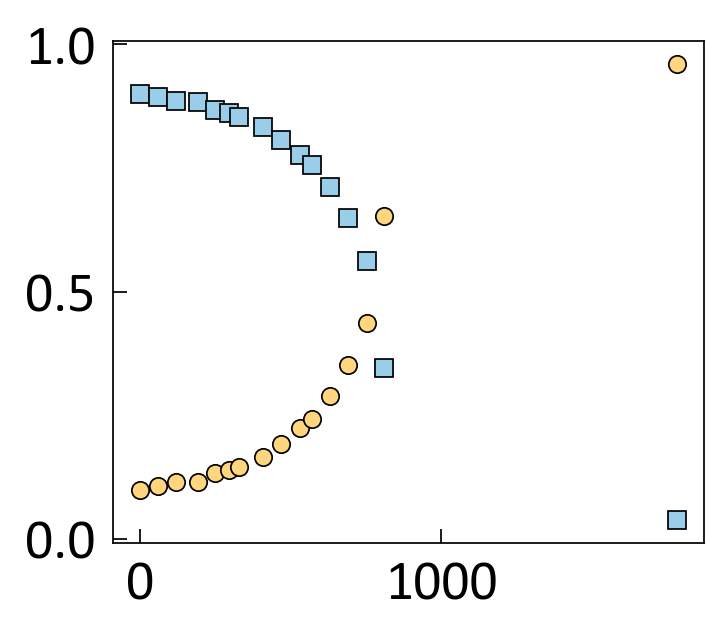

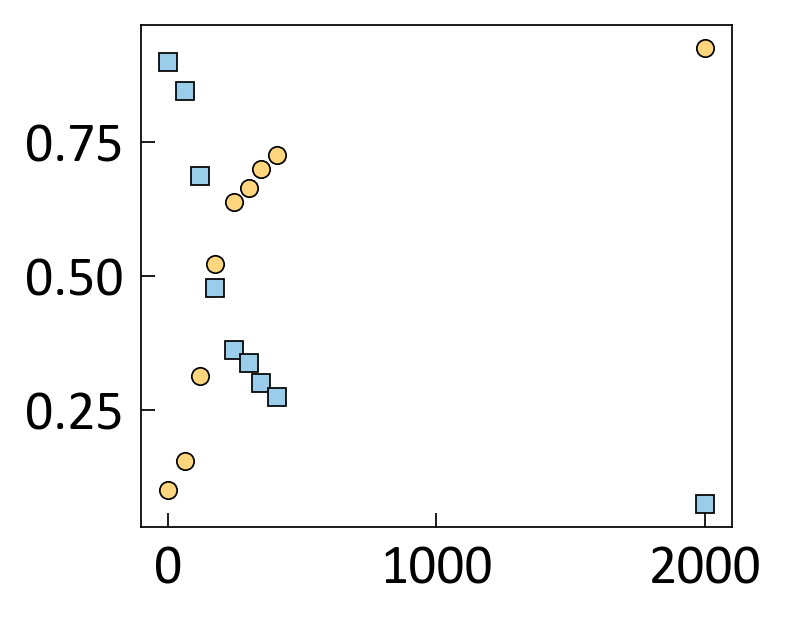

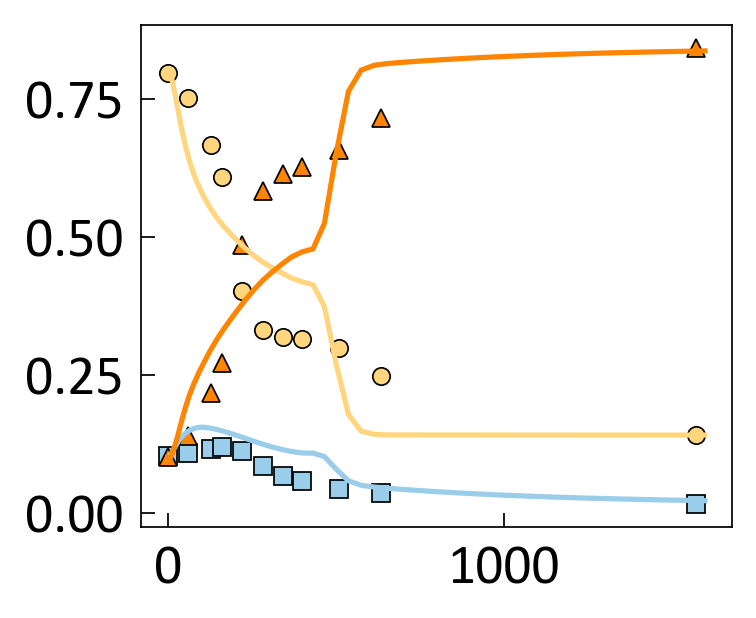

In [2]:
texpw=np.asarray([0,60,120,193,250,296,330,410,470,530,570,630,691,754,810,1780])
wexpw=np.asarray([0.9,0.89299,0.8846,0.88365,0.86635,0.86052,0.8531,0.83376,0.8072,0.77584,0.75664,0.71119,0.64861,0.56269,0.34671,0.03925])

texpe=np.asarray([0,64,120,177,247,301,347,407,2000])
wexpe=np.asarray([0.9,0.84537,0.68653,0.47765,0.36149,0.33674,0.29972,0.27454,0.07407])

texpp=np.asarray([0,60,128,160,222,283,343,400,510,635,1572])
wexpp1=np.asarray([0.10222,0.10793,0.11579,0.11968,0.11112,0.08517,0.06692,0.05747,0.04321,0.03578,0.01578])
wexpp2=np.asarray([0.79779,0.75332,0.66681,0.60852,0.40236,0.33188,0.31786,0.31535,0.29871,0.24788,0.14054])
wexpp3=np.asarray([0.1,0.13875,0.21739,0.2718,0.48652,0.58294,0.61522,0.62718,0.65808,0.71633,0.84368])






fig,ax=plt.subplots()
ax.plot(texpw,wexpw,'C1s')
ax.plot(texpw,1-wexpw,'C5o')
plt.show()

fig2,ax2=plt.subplots()
ax2.plot(texpe,wexpe,'C1s')
ax2.plot(texpe,1-wexpe,'C5o')
plt.show()


fig3,ax3=plt.subplots()
ax3.plot(texpp,wexpp1,'C1s')
ax3.plot(texpp,wexpp2,'C5o')
ax3.plot(texpp,wexpp3,'C3^')

ax3.plot(t/60,wt[:,0],'C1-')
ax3.plot(t/60,wt[:,1],'C5-')
ax3.plot(t/60,wt[:,2],'C3-')
plt.show()


In [3]:
texp=np.asarray([0.,20.83333333,62.5,125,191.6666667,241.6666667,287.5,333.3333333,408.3333333,466.6666667,516.6666667,579.1666667,1525])
w1exp=np.asarray([0.1,0.096803653,0.107468124,0.115349682,0.119496855,0.093297101,0.057657658,0.049818841,0.036231884,0.033423668,0.025157233,0.019927536,0.009981851])
w2exp=np.asarray([0.8,0.806392694,0.746812386,0.67938238,0.421383648,0.365036232,0.29009009,0.280797101,0.264492754,0.258355917,0.224618149,0.210144928,0.158802178])
w3exp=np.asarray([0.1,0.096803653,0.14571949,0.205267938,0.459119497,0.541666667,0.652252252,0.669384058,0.699275362,0.708220416,0.750224618,0.769927536,0.831215971])
witB2=time_dep_surface(texp,wi0,wi8,mobile,taui)

import scipy
def fun(x,D1,D2):
    print(10**D1)
    print(10**D2)
    # witB2=time_dep_surface(x*60,wi0,wi8,mobile,np.asarray([10**tau1,10**tau2]))
    res=Diffusion_MS_iter(x,L,np.asarray([1E-6,10**D1,10**D1,10**D2,10**D2,1E-21]),wi0,wi8,mobile,dlnai_dlnwi_fun=dlnai_dlnwi_fun,witB=witB2,nz=7)[0][:,0]
    print(res)
    return res

Dvecopt=scipy.optimize.curve_fit(fun,texp*60,w1exp,p0=(-9,-9),bounds=([-11,-11],[-6,-6]))[0]
D1=Dvecopt[0]
D2=Dvecopt[1]
wt,wtz,zvec,Lt=Diffusion_MS_iter(t,L,np.asarray([1E-6,10**D1,10**D1,10**D2,10**D2,1E-21]),wi0,wi8,mobile,dlnai_dlnwi_fun=dlnai_dlnwi_fun,witB=witB,nz=21)
print(np.asarray([1E-6,10**D1,10**D1,10**D2,10**D2,1E-21]))


fig,ax=plt.subplots()
ax.plot(t/60,wt[:,0],'C1-')
ax.plot(t/60,wt[:,1],'C3-')
ax.plot(t/60,wt[:,2]+wt[:,3],'C0-')
ax.plot(texp,w1exp,'C1o')
ax.plot(texp,w2exp,'C3o')
ax.plot(texp,w3exp,'C0o')
ax.set_xlabel("t/min")
ax.set_ylabel("$w_i$/-")

plt.xlim([0,2000])
plt.ylim([0,1])


ValueError: shape mismatch: value array of shape (13,2) could not be broadcast to indexing result of shape (13,1)